In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
filepath = 'cali_housing.csv'
data = np.genfromtxt(filepath, delimiter=',')
print(data)

[[ -1.22230000e+02   3.78800000e+01   4.10000000e+01 ...,   8.32520000e+00
    4.52600000e+05   1.00000000e+00]
 [ -1.22220000e+02   3.78600000e+01   2.10000000e+01 ...,   8.30140000e+00
    3.58500000e+05   1.00000000e+00]
 [ -1.22240000e+02   3.78500000e+01   5.20000000e+01 ...,   7.25740000e+00
    3.52100000e+05   1.00000000e+00]
 ..., 
 [ -1.21220000e+02   3.94300000e+01   1.70000000e+01 ...,   1.70000000e+00
    9.23000000e+04   3.00000000e+00]
 [ -1.21320000e+02   3.94300000e+01   1.80000000e+01 ...,   1.86720000e+00
    8.47000000e+04   3.00000000e+00]
 [ -1.21240000e+02   3.93700000e+01   1.60000000e+01 ...,   2.38860000e+00
    8.94000000e+04   3.00000000e+00]]


### 1

In [50]:
field_names = ['longitude','latitude', 'housing_median_age', 'total_rooms',
               'total_bedrooms', 'population', 'households', 'median_income',
               'median_house_value', 'ocean_proximity']

field_to_index = {field: index for index, field in enumerate(field_names)}

print('Field to index mapping:', field_to_index)

Field to index mapping: {'longitude': 0, 'latitude': 1, 'housing_median_age': 2, 'total_rooms': 3, 'total_bedrooms': 4, 'population': 5, 'households': 6, 'median_income': 7, 'median_house_value': 8, 'ocean_proximity': 9}


### 2

In [27]:

ocean_ind=field_to_index['ocean_proximity']
ocean_proximity_values=data[:,ocean_ind]

count_5=np.count_nonzero(ocean_proximity_values==5)
count_5


5

### 3

In [28]:
popul_col=data[:,field_to_index['population']]
avg_population=np.mean(popul_col);
avg_population

1425.4767441860465

### 4

In [55]:
med_income= data[:,field_to_index['median_income']]
tot_income=np.sum(med_income);
tot_income

# print(med_income)

79890.6495

### 5

In [35]:
one=np.mean(data[data[:,field_to_index['ocean_proximity']]==1,field_to_index['median_income']]);
two=np.mean(data[data[:,field_to_index['ocean_proximity']]==2,field_to_index['median_income']]);

if one>two:
    print("YES");
else: 
    print("NO");

NO


### 6

In [51]:
most_northerly_block_index = np.argmax(data[:, field_to_index['latitude']])
# print(field_to_index['latitude'])

most_northerly_block_latitude = data[most_northerly_block_index, field_to_index['latitude']]
most_northerly_block_latitude

41.950000000000003

### 7

In [54]:

income_mean = np.mean(data[:, field_to_index['median_income']])
income_std = np.std(data[:, field_to_index['median_income']])
house_value_mean = np.mean(data[:, field_to_index['median_house_value']])
house_value_std = np.std(data[:, field_to_index['median_house_value']])


correlation_coefficient = np.sum((data[:, field_to_index['median_income']] - income_mean) * (data[:, field_to_index['median_house_value']] - house_value_mean)) / (income_std * house_value_std * len(data))

print(f"The Karl Pearson's coefficiente is {correlation_coefficient}")


The Karl Pearson's coefficiente is 0.6880752079585479


### 8

In [53]:

largest_income = np.max(data[:, field_to_index['median_income']])


low_income_threshold = 0.25 * largest_income


low_income_record_count = np.count_nonzero(data[:, field_to_index['median_income']] < low_income_threshold)

print(f"There are {low_income_record_count} records with annual income less than 25% of the largest income")


There are 11516 records with annual income less than 25% of the largest income


### 9

In [77]:
filtered_data = data[np.isfinite(data[:, field_to_index['total_bedrooms']]) & np.isfinite(data[:, field_to_index['households']])]
avg_bed_house = np.mean(filtered_data[:, field_to_index['total_bedrooms']] / filtered_data[:, field_to_index['households']])
print(avg_bed_house)

1.09706238581


### 10

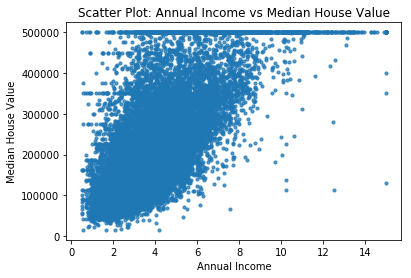

In [72]:
import matplotlib.pyplot as plt

# plt.figure(figsize=(10, 6))
plt.scatter(data[:, field_to_index['median_income']], data[:, field_to_index['median_house_value']], s=10, alpha=0.75)


plt.xlabel("Annual Income")
plt.ylabel("Median House Value")


plt.title("Scatter Plot: Annual Income vs Median House Value")

plt.show()


### 11

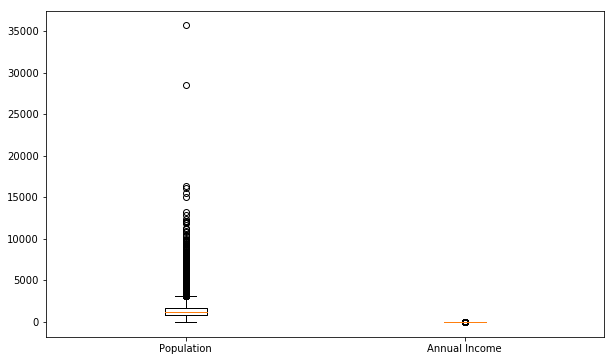

In [70]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))


plt.boxplot([data[:, field_to_index['population']], data[:, field_to_index['median_income']]], labels=["Population", "Annual Income"])

plt.show()


### 12

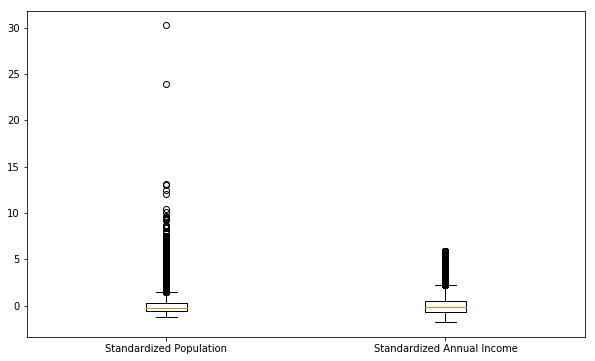

In [67]:

standardized_population = (data[:, field_to_index['population']] - np.mean(data[:, field_to_index['population']])) / np.std(data[:, field_to_index['population']])
standardized_annual_income = (data[:, field_to_index['median_income']] - np.mean(data[:, field_to_index['median_income']])) / np.std(data[:, field_to_index['median_income']])

plt.figure(figsize=(10, 6))
plt.boxplot([standardized_population, standardized_annual_income], labels=["Standardized Population", "Standardized Annual Income"])


plt.show()


### 15

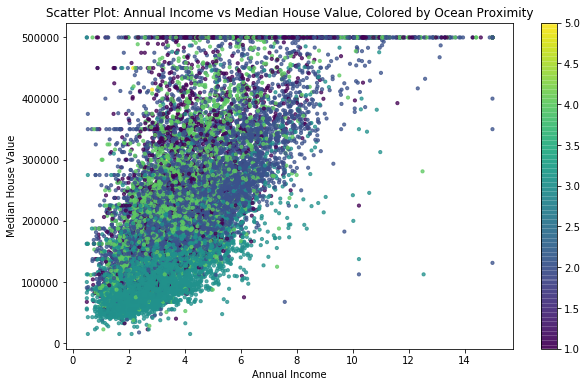

In [73]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))

plt.scatter(data[:, 7], data[:, 8], c=data[:, -1], s=10, alpha=0.75)


plt.xlabel("Annual Income")
plt.ylabel("Median House Value")


plt.colorbar()


plt.title("Scatter Plot: Annual Income vs Median House Value, Colored by Ocean Proximity")


plt.show()


### 13

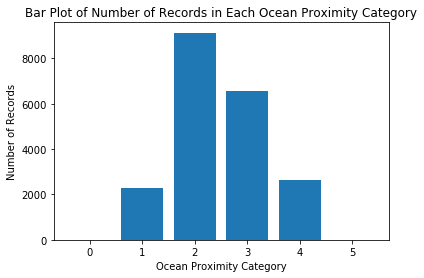

In [83]:
ocean_proximity_array = data[:, field_to_index['ocean_proximity']].astype(np.int64)
ocean_proximity_counts = np.bincount(ocean_proximity_array)
fig, ax = plt.subplots()
ax.bar(np.arange(len(ocean_proximity_counts)), ocean_proximity_counts)
ax.set_xlabel("Ocean Proximity Category")
ax.set_ylabel("Number of Records")
ax.set_title("Bar Plot of Number of Records in Each Ocean Proximity Category")
plt.show()


### 14

In [84]:
import numpy as np
import matplotlib.pyplot as plt


distance_matrix = np.sqrt(np.sum((data[:, 5] - data[:, 5][:, np.newaxis])**2 + (data[:, 7] - data[:, 7][:, np.newaxis])**2, axis=1))


plt.figure(figsize=(10, 10))
plt.matshow(distance_matrix)


plt.xlabel("Record Index")
plt.ylabel("Record Index")


plt.title("Distance Matrix using the Euclidean Norm")


plt.show()


ValueError: not enough values to unpack (expected 2, got 1)